# [SC57 - Working with big, multi-dimensional geoscientific datasets in Python: a tutorial introduction to xarray](http://meetingorganizer.copernicus.org/EGU2017/session/25651)  
  
  
Original notebook by [Stephan Hoyer](http://stephanhoyer.com), Rossbypalooza, 2016.  
Modified by Edward Byers, Matthew Gidden and [Fabien Maussion](http://fabienmaussion.info/) for EGU General Assembly 2017, Vienna, Austria


  
  Thursday, 27th April, 15:30–17:00 / Room -2.91  
  
  
**Convenors**
* [Dr Edward Byers](byers@iiasa.ac.at)    - International Institute for Applied Systems Analysis, Laxenburg, Austria
* [Dr Matthew Gidden](gidden@iiasa.ac.at)  - International Institute for Applied Systems Analysis, Laxenburg, Austria
* [Dr Fabien Maussion](fabien.maussion@uibk.ac.at) - University of Innsbruck, Innsbruck, Austria
-------------



# Structure of this talk

1. Introduction to key features of `xarray`
2. Basic operations in xarray: opening, inspecting, selecting and indexing data
3. Working with multiple datasets and computation
4. Introduction to out-of-core computation
5. Working with `pandas` and other packages (`Salem`?)




# 1. Key features of `xarray`

## What is `xarray`?

*  `xarray` is an open source project and Python package
*  `xarray` has been designed to perform labelled data analysis on multi-dimensional arrays
* the xarray approach adopts the Common Data Model for self- describing scientific data in widespread use in the Earth sciences
*  `xarray.Dataset` is an in-memory representation of a netCDF file.

## What is `xarray` good for?

* Gridded, multi-dimensional and large datasets, commonly used in earth sciences, but also increasingly finance and biological sciences
* Out of core computation and parallel processing
...(others?!)

## Where can I find more info?
This notebook introduces xarray for new users in the geophysical sciences.

### For more information about xarray

- Read the [online documentation](http://xarray.pydata.org/)
- Ask questions on [StackOverflow](http://stackoverflow.com/questions/tagged/python-xarray)
- View the source code and file bug reports on [GitHub](http://github.com/pydata/xarray/)

### For more doing data analysis with Python:

- Thomas Wiecki, [A modern guide to getting started with Data Science and Python](http://twiecki.github.io/blog/2014/11/18/python-for-data-science/)
- Wes McKinney, [Python for Data Analysis](http://shop.oreilly.com/product/0636920023784.do) (book)

### Packages building on xarray for the geophysical sciences

For analyzing GCM output:

- [xgcm](https://github.com/xgcm/xgcm) by Ryan Abernathey
- [oogcm](https://github.com/lesommer/oocgcm) by Julien Le Sommer
- [MPAS xarray](https://github.com/pwolfram/mpas_xarray) by Phil Wolfram
- [marc_analysis](https://github.com/darothen/marc_analysis) by Daniel Rothenberg

Other tools:

- [windspharm](https://github.com/ajdawson/windspharm): wind spherical harmonics by Andrew Dawson
- [eofs](https://github.com/ajdawson/eofs): empirical orthogonal functions by Andrew Dawson
- [infinite-diff](https://github.com/spencerahill/infinite-diff) by Spencer Hill 
- [aospy](https://github.com/spencerahill/aospy) by Spencer Hill and Spencer Clark

Resources for teaching and learning xarray in geosciences:
- [Fabien's teaching repo](https://github.com/fmaussion/teaching): courses that combine teaching climatology and xarray


# 2. Basic operations in `xarray`

-------------------

## Import packages

In [34]:
# standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr

%matplotlib inline

# np.set_printoptions(precision=3, linewidth=80, edgeitems=1)  # make numpy less verbose
# xr.set_options(line_width=70)

## Basic data arrays in numpy

In [35]:
import numpy as np
a = np.array([[1, 3, 9], [2, 8, 4]])
a

array([[1, 3, 9],
       [2, 8, 4]])

In [36]:
a[1, 2]

4

In [37]:
a.mean(axis=0)

array([ 1.5,  5.5,  6.5])

In [38]:
# Our data

<img src="./figures/dataset.png" width="50%" align="right"> 

- numeric
- multi-dimensional
- labelled
- (lots of) metadata
- sometimes (very) large

SyntaxError: invalid syntax (<ipython-input-38-04492ec5179c>, line 3)

#### `xarray.Dataset` is a container for multiple `xarray.DataArray` objects

We'll start with the "air_temperature" tutorial dataset:

In [11]:
ds = xr.tutorial.load_dataset('air_temperature')

In [12]:
ds.air

<xarray.DataArray 'air' (time: 2920, lat: 25, lon: 53)>
array([[[ 241.2 ,  242.5 , ...,  235.5 ,  238.6 ],
        [ 243.8 ,  244.5 , ...,  235.3 ,  239.3 ],
        ..., 
        [ 295.9 ,  296.2 , ...,  295.9 ,  295.2 ],
        [ 296.29,  296.79, ...,  296.79,  296.6 ]],

       [[ 242.1 ,  242.7 , ...,  233.6 ,  235.8 ],
        [ 243.6 ,  244.1 , ...,  232.5 ,  235.7 ],
        ..., 
        [ 296.2 ,  296.7 , ...,  295.5 ,  295.1 ],
        [ 296.29,  297.2 , ...,  296.4 ,  296.6 ]],

       ..., 
       [[ 245.79,  244.79, ...,  243.99,  244.79],
        [ 249.89,  249.29, ...,  242.49,  244.29],
        ..., 
        [ 296.29,  297.19, ...,  295.09,  294.39],
        [ 297.79,  298.39, ...,  295.49,  295.19]],

       [[ 245.09,  244.29, ...,  241.49,  241.79],
        [ 249.89,  249.29, ...,  240.29,  241.69],
        ..., 
        [ 296.09,  296.89, ...,  295.69,  295.19],
        [ 297.69,  298.09, ...,  296.19,  295.69]]])
Coordinates:
  * lat      (lat) float32 75.0 72.5 7

In [13]:
ds

<xarray.Dataset>
Dimensions:  (lat: 25, lon: 53, time: 2920)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 62.5 60.0 57.5 55.0 52.5 ...
  * lon      (lon) float32 200.0 202.5 205.0 207.5 210.0 212.5 215.0 217.5 ...
  * time     (time) datetime64[ns] 2013-01-01 2013-01-01T06:00:00 ...
Data variables:
    air      (time, lat, lon) float64 241.2 242.5 243.5 244.0 244.1 243.9 ...
Attributes:
    Conventions: COARDS
    title: 4x daily NMC reanalysis (1948)
    description: Data is from NMC initialized reanalysis
(4x/day).  These are the 0.9950 sigma level values.
    platform: Model
    references: http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanalysis.html

In [6]:
ds.dims

Frozen(SortedKeysDict({u'lat': 25, u'lon': 53, u'time': 2920}))

In [7]:
ds.attrs

OrderedDict([(u'Conventions', u'COARDS'),
             (u'title', u'4x daily NMC reanalysis (1948)'),
             (u'description',
              u'Data is from NMC initialized reanalysis\n(4x/day).  These are the 0.9950 sigma level values.'),
             (u'platform', u'Model'),
             (u'references',
              u'http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanalysis.html')])

In [9]:
ds.air.values

array([[[ 241.2 , ...,  238.6 ],
        ..., 
        [ 296.29, ...,  296.6 ]],

       ..., 
       [[ 245.09, ...,  241.79],
        ..., 
        [ 297.69, ...,  295.69]]])

In [10]:
ds.air.dims

(u'time', u'lat', u'lon')

In [11]:
ds.air.attrs

OrderedDict([(u'long_name', u'4xDaily Air temperature at sigma level 995'),
             (u'units', u'degK'),
             (u'precision', 2),
             (u'GRIB_id', 11),
             (u'GRIB_name', u'TMP'),
             (u'var_desc', u'Air temperature'),
             (u'dataset', u'NMC Reanalysis'),
             (u'level_desc', u'Surface'),
             (u'statistic', u'Individual Obs'),
             (u'parent_stat', u'Other'),
             (u'actual_range', array([ 185.16,  322.1 ], dtype=float32))])

In [12]:
ds.air.attrs['tutorial']=24102016

In [13]:
ds.air.attrs

OrderedDict([(u'long_name', u'4xDaily Air temperature at sigma level 995'),
             (u'units', u'degK'),
             (u'precision', 2),
             (u'GRIB_id', 11),
             (u'GRIB_name', u'TMP'),
             (u'var_desc', u'Air temperature'),
             (u'dataset', u'NMC Reanalysis'),
             (u'level_desc', u'Surface'),
             (u'statistic', u'Individual Obs'),
             (u'parent_stat', u'Other'),
             (u'actual_range', array([ 185.16,  322.1 ], dtype=float32)),
             ('tutorial', 24102016)])

## xarray.Datasets with multiple variables

In [ ]:
f = 'ERA-Int-MonthlyAvg-4D-TUVWZ.nc'
dse = xr.open_dataset(f)
dse

#### Reading and writing netCDF

Under the covers, this uses scipy or the [netCDF4-Python](https://github.com/unidata/netcdf4-python) library:

In [15]:
ds.to_netcdf('another-copy-1.nc')

C:\Anaconda2\Lib\site-packages\xarray\conventions.py:1085: RuntimeWarning: saving variable air with floating point data as an integer dtype without any _FillValue to use for NaNs
  for k, v in iteritems(variables))


In [16]:
xr.open_dataset('another-copy-1.nc')

<xarray.Dataset>
Dimensions:  (lat: 25, lon: 53, time: 2920)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 62.5 60.0 57.5 55.0 52.5 ...
  * lon      (lon) float32 200.0 202.5 205.0 207.5 210.0 212.5 215.0 217.5 ...
  * time     (time) datetime64[ns] 2013-01-01 2013-01-01T06:00:00 ...
Data variables:
    air      (time, lat, lon) float64 241.2 242.5 243.5 244.0 244.1 243.9 ...
Attributes:
    Conventions: COARDS
    title: 4x daily NMC reanalysis (1948)
    description: Data is from NMC initialized reanalysis
(4x/day).  These are the 0.9950 sigma level values.
    platform: Model
    references: http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanalysis.html

## Selecting data with named dimensions
In xarray there are many different ways for selecting and indexing data

In [39]:
dse.t

NameError: name 'dse' is not defined

### By value

In [40]:
dse.t.sel(month=8, level=200)

NameError: name 'dse' is not defined

### By index

In [ ]:
dse.t.sel(month=7, level=3)

### Works well for lat, lon and time, too

In [24]:
ds.air.sel(time='2013-01-02')

<xarray.DataArray 'air' (lat: 25, lon: 53)>
array([[ 244.1 ,  243.8 ,  243.5 , ...,  237.2 ,  239.3 ,  242.  ],
       [ 247.8 ,  246.8 ,  245.5 , ...,  234.5 ,  235.5 ,  237.8 ],
       [ 253.8 ,  251.89,  249.8 , ...,  237.7 ,  239.  ,  242.  ],
       ..., 
       [ 296.1 ,  295.29,  295.2 , ...,  295.6 ,  295.7 ,  295.  ],
       [ 297.4 ,  297.  ,  296.1 , ...,  296.2 ,  296.4 ,  296.1 ],
       [ 297.5 ,  297.6 ,  297.1 , ...,  296.6 ,  296.5 ,  296.9 ]])
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 62.5 60.0 57.5 55.0 52.5 ...
  * lon      (lon) float32 200.0 202.5 205.0 207.5 210.0 212.5 215.0 217.5 ...
    time     datetime64[ns] 2013-01-02T06:00:00
Attributes:
    long_name: 4xDaily Air temperature at sigma level 995
    units: degK
    precision: 2
    GRIB_id: 11
    GRIB_name: TMP
    var_desc: Air temperature
    dataset: NMC Reanalysis
    level_desc: Surface
    statistic: Individual Obs
    parent_stat: Other
    actual_range: [ 185.16  322.1 ]

In [23]:
ds.air.sel(time='2013-01-02T06:00:00')

<xarray.DataArray 'air' (lat: 25, lon: 53)>
array([[ 244.1 ,  243.8 ,  243.5 , ...,  237.2 ,  239.3 ,  242.  ],
       [ 247.8 ,  246.8 ,  245.5 , ...,  234.5 ,  235.5 ,  237.8 ],
       [ 253.8 ,  251.89,  249.8 , ...,  237.7 ,  239.  ,  242.  ],
       ..., 
       [ 296.1 ,  295.29,  295.2 , ...,  295.6 ,  295.7 ,  295.  ],
       [ 297.4 ,  297.  ,  296.1 , ...,  296.2 ,  296.4 ,  296.1 ],
       [ 297.5 ,  297.6 ,  297.1 , ...,  296.6 ,  296.5 ,  296.9 ]])
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 62.5 60.0 57.5 55.0 52.5 ...
  * lon      (lon) float32 200.0 202.5 205.0 207.5 210.0 212.5 215.0 217.5 ...
    time     datetime64[ns] 2013-01-02T06:00:00
Attributes:
    long_name: 4xDaily Air temperature at sigma level 995
    units: degK
    precision: 2
    GRIB_id: 11
    GRIB_name: TMP
    var_desc: Air temperature
    dataset: NMC Reanalysis
    level_desc: Surface
    statistic: Individual Obs
    parent_stat: Other
    actual_range: [ 185.16  322.1 ]

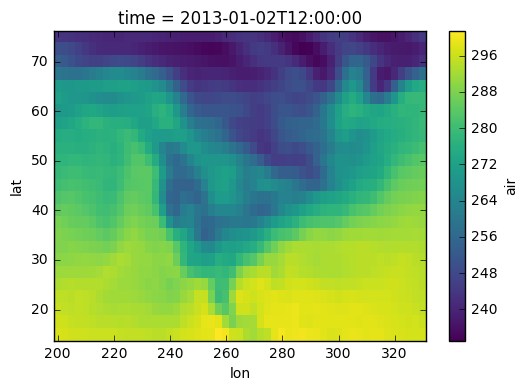

In [31]:
ds.air.sel(time='2013-01-02')[2]#.plot()

(array([    692.,   10077.,   21565.,   27267.,   39600.,   83332.,  144063.,
          81944.,   13998.,     862.]),
 array([ 231.5,  239.1,  246.7,  254.3,  261.9,  269.5,  277.1,  284.7,  292.3,
         299.9,  307.5]),
 <a list of 10 Patch objects>)

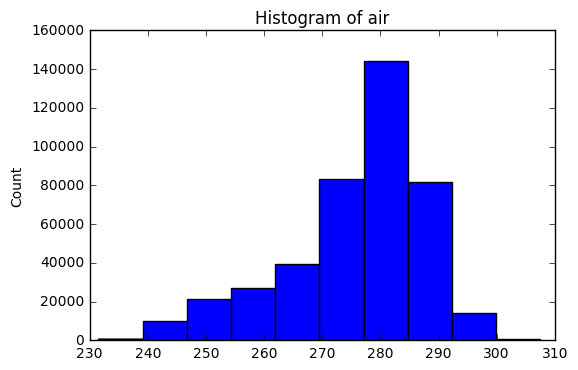

In [30]:
ds.air.sel(lat=slice(60, 50), lon=slice(200, 270)) #.plot()

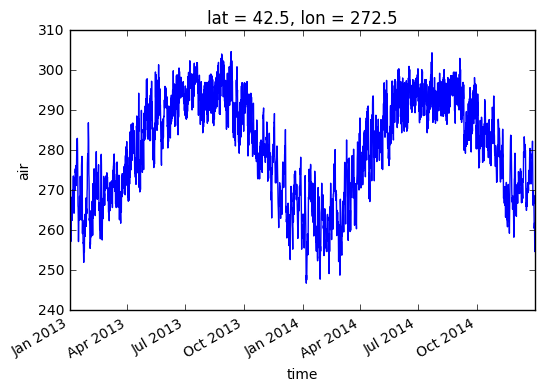

In [32]:
ds.air.sel(lat=41.8781, lon=360-87.6298, method='nearest', tolerance=5)#.plot()

# 3. Working with multiple datasets and computation

* We can do arithmetic directly on `Dataset` and `DataArray` objects. 
* Labels are preserved and dataArray dimensions automatically aligned.
* We can open multiple datasets easily

In [ ]:
import sys


In [ ]:
### Broadcasting

<img src="./figures/broadcast.png" width="50%" align="left"> 

In [ ]:
a = xr.DataArray(np.arange(3), dims='time', 
                 coords={'time':np.arange(3)})
b = xr.DataArray(np.arange(4), dims='space', 
                 coords={'space':np.arange(4)})
a + b

In [ ]:
### Alignment

<img src="./figures/align.png" width="50%" align="left"> 

In [ ]:
a = xr.DataArray(np.arange(3), dims='time', 
                 coords={'time':np.arange(3)})
b = xr.DataArray(np.arange(5), dims='time', 
                 coords={'time':np.arange(5)+1})
a + b

In [20]:
2 * ds

<xarray.Dataset>
Dimensions:  (lat: 25, lon: 53, time: 2920)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 62.5 60.0 57.5 55.0 52.5 ...
  * lon      (lon) float32 200.0 202.5 205.0 207.5 210.0 212.5 215.0 217.5 ...
  * time     (time) datetime64[ns] 2013-01-01 2013-01-01T06:00:00 ...
Data variables:
    air      (time, lat, lon) float64 482.4 485.0 487.0 488.0 488.2 487.8 ...
Attributes:
    Conventions: COARDS
    title: 4x daily NMC reanalysis (1948)
    description: Data is from NMC initialized reanalysis
(4x/day).  These are the 0.9950 sigma level values.
    platform: Model
    references: http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanalysis.html

You can also apply NumPy "universal functions" like `np.sqrt` to `DataArray` objects:

In [21]:
np.sqrt(ds.air)

<xarray.DataArray 'air' (time: 2920, lat: 25, lon: 53)>
array([[[ 15.531, ...,  15.447],
        ..., 
        [ 17.213, ...,  17.222]],

       ..., 
       [[ 15.655, ...,  15.55 ],
        ..., 
        [ 17.254, ...,  17.196]]])
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 62.5 60.0 57.5 55.0 52.5 ...
  * lon      (lon) float32 200.0 202.5 205.0 207.5 210.0 212.5 215.0 217.5 ...
  * time     (time) datetime64[ns] 2013-01-01 2013-01-01T06:00:00 ...

xarray also implements standard aggregation functions:

In [22]:
ds.max()

<xarray.Dataset>
Dimensions:  ()
Coordinates:
    *empty*
Data variables:
    air      float64 317.4

In [23]:
ds.mean(dim='time')

<xarray.Dataset>
Dimensions:  (lat: 25, lon: 53)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 62.5 60.0 57.5 55.0 52.5 ...
  * lon      (lon) float32 200.0 202.5 205.0 207.5 210.0 212.5 215.0 217.5 ...
Data variables:
    air      (lat, lon) float64 260.4 260.2 259.9 259.5 259.0 258.6 258.2 ...

In [24]:
ds.median(dim=['lat', 'lon'])

<xarray.Dataset>
Dimensions:  (time: 2920)
Coordinates:
  * time     (time) datetime64[ns] 2013-01-01 2013-01-01T06:00:00 ...
Data variables:
    air      (time) float64 277.5 276.7 276.2 276.8 277.0 275.3 275.6 275.4 ...

## Exercises

Calculate the maximum air surface temperature over time for San Francisco, CA (latitude=37.7749, longitude=122.4194)

In [25]:
ds.sel(lat=37.77, lon=360-122.419, method='nearest', tolerance=2).max()

<xarray.Dataset>
Dimensions:  ()
Coordinates:
    *empty*
Data variables:
    air      float64 301.4

Convert the dataset from Kelvin to degrees Celsius and save to a new netCDF file.

Don't forget to fix the temperature units! Recall `degC = degK - 273`.

In [26]:
ds_celsius = ds - 273
ds_celsius.air.attrs['units'] = 'kelvin'
ds_celsius.to_netcdf('temperature-in-kelvin.nc')

----------------------

## xarray comes with built-in plotting, based on matplotlib

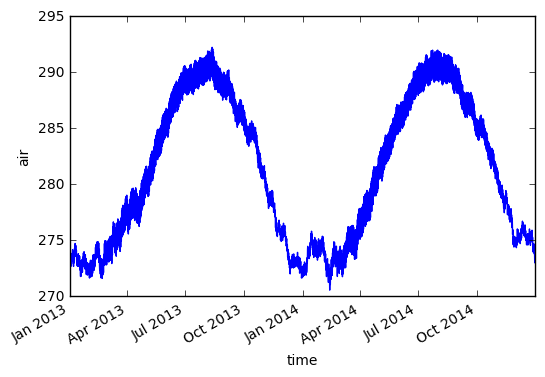

In [27]:
ds.mean(['lat', 'lon']).air.plot()

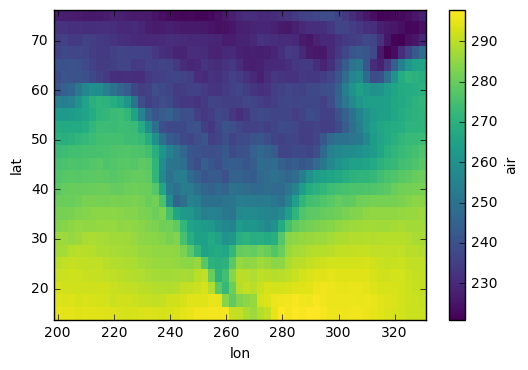

In [28]:
ds.min('time').air.plot()

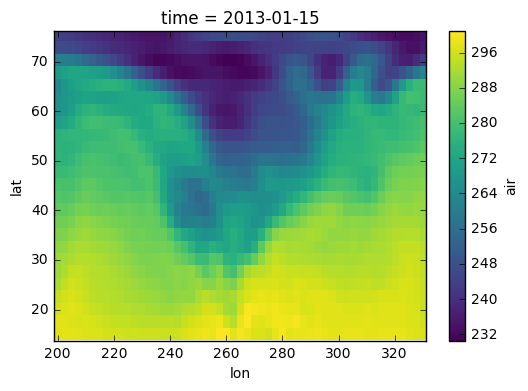

In [29]:
ds.air.sel(time='2013-01-15')[0].plot.imshow()

## Time series

Xarray implements the "split-apply-combine" paradigm with `groupby`. This works really well for calculating climatologies:

In [30]:
ds.groupby('time.season').mean()

<xarray.Dataset>
Dimensions:  (season: 4)
Coordinates:
  * season   (season) object 'DJF' 'JJA' 'MAM' 'SON'
Data variables:
    air      (season) float64 273.6 289.2 279.0 283.0

In [31]:
clim = ds.groupby('time.month').mean('time')

In [32]:
clim

<xarray.Dataset>
Dimensions:  (lat: 25, lon: 53, month: 12)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 62.5 60.0 57.5 55.0 52.5 ...
  * lon      (lon) float32 200.0 202.5 205.0 207.5 210.0 212.5 215.0 217.5 ...
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    air      (month, lat, lon) float64 246.3 246.4 246.2 245.8 245.2 244.6 ...

You can also do arithmetic with groupby objects, which repeats the arithmetic over each group:

In [33]:
anomalies = ds.groupby('time.month') - clim

In [34]:
anomalies

<xarray.Dataset>
Dimensions:  (lat: 25, lon: 53, time: 2920)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 62.5 60.0 57.5 55.0 52.5 ...
  * lon      (lon) float32 200.0 202.5 205.0 207.5 210.0 212.5 215.0 217.5 ...
    month    (time) int32 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ...
  * time     (time) datetime64[ns] 2013-01-01 2013-01-01T06:00:00 ...
Data variables:
    air      (time, lat, lon) float64 -5.15 -3.886 -2.715 -1.812 -1.125 ...

In [35]:
anomalies.air.time

<xarray.DataArray 'time' (time: 2920)>
array(['2013-01-01T00:00:00.000000000', ..., '2014-12-31T18:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
    month    (time) int32 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ...
  * time     (time) datetime64[ns] 2013-01-01 2013-01-01T06:00:00 ...
Attributes:
    standard_name: time
    long_name: Time

(array([  8.400e+01,   9.000e+02,   1.146e+04,   9.762e+04,   5.206e+05,
          2.677e+06,   4.679e+05,   8.460e+04,   8.757e+03,   4.490e+02]),
 array([-33.741, -27.574, -21.406, -15.239,  -9.072,  -2.905,   3.263,   9.43 ,
         15.597,  21.764,  27.932]),
 <a list of 10 Patch objects>)

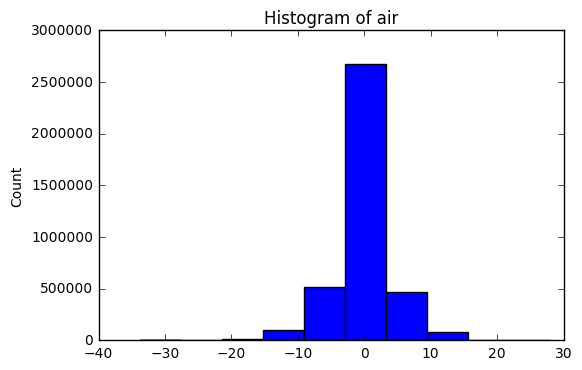

In [36]:
anomalies.air.plot() 

(array([  1.800e+01,   5.230e+02,   4.120e+03,   1.382e+04,   5.814e+04,
          5.203e+04,   1.410e+04,   4.672e+03,   8.970e+02,   8.100e+01]),
 array([-23.194, -18.549, -13.903,  -9.258,  -4.612,   0.033,   4.679,   9.324,
         13.97 ,  18.615,  23.261]),
 <a list of 10 Patch objects>)

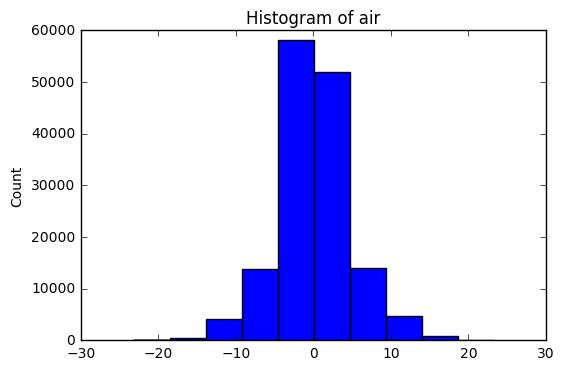

In [37]:
anomalies.air.sel(time= '2013-02').plot() # Find all the values for january

Resample adjusts a time series to a new resolution:

In [38]:
tmin = ds.air.resample('1D', dim='time', how='min')  # Resample to one day '1D
tmax = ds.air.resample('1D', dim='time', how='max')

In [39]:
tmin

<xarray.DataArray 'air' (time: 730, lat: 25, lon: 53)>
array([[[ 241.2 , ...,  235.8 ],
        ..., 
        [ 296.29, ...,  296.6 ]],

       ..., 
       [[ 242.49, ...,  241.79],
        ..., 
        [ 297.69, ...,  295.19]]])
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 62.5 60.0 57.5 55.0 52.5 ...
  * lon      (lon) float32 200.0 202.5 205.0 207.5 210.0 212.5 215.0 217.5 ...
  * time     (time) datetime64[ns] 2013-01-01 2013-01-02 2013-01-03 ...

In [40]:
ds_extremes = xr.Dataset({'tmin': tmin, 'tmax': tmax})

In [41]:
ds_extremes

<xarray.Dataset>
Dimensions:  (lat: 25, lon: 53, time: 730)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 62.5 60.0 57.5 55.0 52.5 ...
  * lon      (lon) float32 200.0 202.5 205.0 207.5 210.0 212.5 215.0 217.5 ...
  * time     (time) datetime64[ns] 2013-01-01 2013-01-02 2013-01-03 ...
Data variables:
    tmax     (time, lat, lon) float64 242.3 242.7 243.5 244.0 244.1 243.9 ...
    tmin     (time, lat, lon) float64 241.2 241.8 241.8 242.1 242.6 243.3 ...

## Pandas

[Pandas](http://pandas.pydata.org) is the best way to work with tabular data (e.g., CSV files) in Python. It's also a highly flexible data analysis tool, with way more functionality than xarray.

In [42]:
df = ds.to_dataframe()

In [43]:
df.head()

air
lat  lon   time                       
75.0 200.0 2013-01-01 00:00:00  241.20
           2013-01-01 06:00:00  242.10
           2013-01-01 12:00:00  242.30
           2013-01-01 18:00:00  241.89
           2013-01-02 00:00:00  243.20

Pandas provides very robust tools for reading and writing CSV:

In [44]:
print(df.head(10).to_csv())

lat,lon,time,air
75.0,200.0,2013-01-01 00:00:00,241.2
75.0,200.0,2013-01-01 06:00:00,242.1
75.0,200.0,2013-01-01 12:00:00,242.3
75.0,200.0,2013-01-01 18:00:00,241.89
75.0,200.0,2013-01-02 00:00:00,243.2
75.0,200.0,2013-01-02 06:00:00,244.1
75.0,200.0,2013-01-02 12:00:00,243.3
75.0,200.0,2013-01-02 18:00:00,243.8
75.0,200.0,2013-01-03 00:00:00,244.8
75.0,200.0,2013-01-03 06:00:00,243.89



Of course, it's just as easy to convert back from pandas:

In [45]:
xr.Dataset.from_dataframe(df)

<xarray.Dataset>
Dimensions:  (lat: 25, lon: 53, time: 2920)
Coordinates:
  * lat      (lat) float64 15.0 17.5 20.0 22.5 25.0 27.5 30.0 32.5 35.0 37.5 ...
  * lon      (lon) float64 200.0 202.5 205.0 207.5 210.0 212.5 215.0 217.5 ...
  * time     (time) datetime64[ns] 2013-01-01 2013-01-01T06:00:00 ...
Data variables:
    air      (lat, lon, time) float64 296.3 296.3 296.4 297.5 297.8 297.5 ...

If you're using pandas 0.18 or newer, you can write `df.to_xarray()`

### Things you can do with pandas

In [46]:
df.describe()

,air
count,3.869000e+06
mean,2.812550e+02
std,1.632041e+01
min,2.210000e+02
25%,2.722000e+02
50%,2.852000e+02
75%,2.946000e+02
max,3.174000e+02


In [47]:
df.sample(10)

air
lat  lon   time                       
65.0 322.5 2013-11-16 00:00:00  263.90
20.0 240.0 2014-12-17 00:00:00  296.29
45.0 220.0 2014-02-14 12:00:00  281.29
     237.5 2014-11-10 00:00:00  282.69
30.0 207.5 2013-10-05 00:00:00  298.00
70.0 285.0 2013-08-18 06:00:00  271.90
37.5 217.5 2014-09-11 06:00:00  294.50
45.0 322.5 2014-01-19 06:00:00  287.79
     270.0 2014-04-17 18:00:00  278.29
70.0 217.5 2014-09-24 00:00:00  273.00

Statistical visualization with [Seaborn](https://stanford.edu/~mwaskom/software/seaborn/):

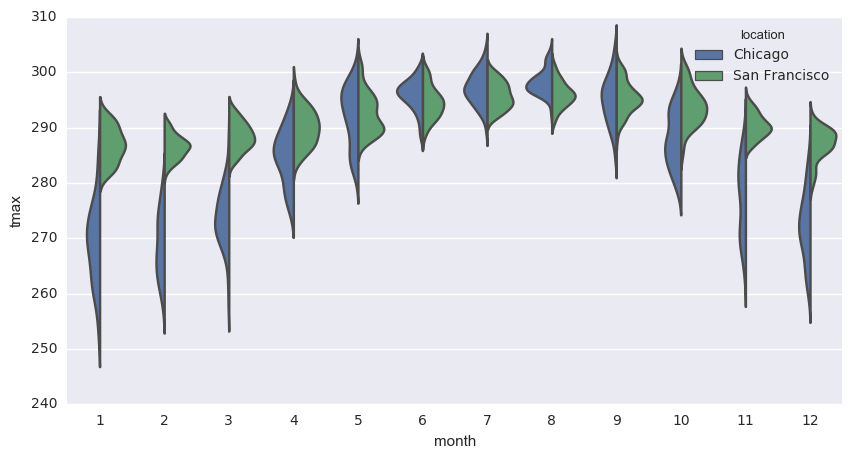

In [48]:
import seaborn as sns

data = (ds_extremes
        .sel_points(lat=[41.8781, 37.7749], lon=[360-87.6298, 360-122.4194],
                    method='nearest', tolerance=3,
                    dim=xr.DataArray(['Chicago', 'San Francisco'],
                                     name='location', dims='location'))
        .to_dataframe()
        .reset_index()
        .assign(month=lambda x: x.time.dt.month))

plt.figure(figsize=(10, 5))
sns.violinplot('month', 'tmax', 'location', data=data, split=True, inner=None)

-------------------

## Exercise

Calculate anomalies for `tmin`. Plot a 2D map of these anomalies for `2014-12-31`.

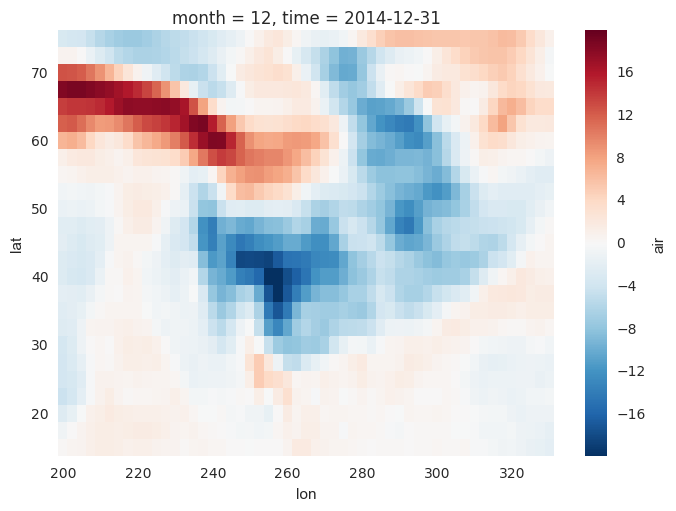

In [49]:
tmin_clim = tmin.groupby('time.month').mean('time')
tmin_anom = tmin.groupby('time.month') - tmin_clim
tmin_anom.sel(time='2014-12-31').plot()

-------------------

## xarray also works for data that doesn't fit in memory

Here's a quick demo of [how xarray can leverage dask](http://xarray.pydata.org/en/stable/dask.html) to work with data that doesn't fit in memory. This lets xarray substitute for tools like `cdo` and `nco`.

Tell dask we want to use 4 threads (one for each core we have):

In [2]:
import dask
import glob2
from multiprocessing.pool import ThreadPool

dask.set_options(pool=ThreadPool(16))

Open a bunch of netCDF files from disk using `xarray.open_mfdataset`:

In [3]:
listy = glob2.glob("N:\\Wat-Data\\ISI-MIP1\\multi-GHM_output\\PCRGLOBWB\\tmp\\pcrglobwb_hadgem2-es_rcp8p5_nosoc_dis_daily_203*.nc")
#listy.extend(glob2.glob("N:\\Wat-Data\\ISI-MIP1\\multi-GHM_output\\PCRGLOBWB\\tmp\\pcrglobwb_hadgem2-es_rcp8p5_nosoc_dis_daily_202*.nc"))
#listy.extend(glob2.glob("N:\\Wat-Data\\ISI-MIP1\\multi-GHM_output\\PCRGLOBWB\\tmp\\pcrglobwb_hadgem2-es_rcp8p5_nosoc_dis_daily_203*.nc"))
ds = xr.open_mfdataset(listy, chunks={'lon': 360},concat_dim = 'time') 
ds.nbytes * (2 **-30)  #How many gigabytes of data?

7.052738904953003

In [4]:
len(listy)

10

In [5]:
ds

<xarray.Dataset>
Dimensions:  (lat: 360, lon: 720, time: 3652)
Coordinates:
  * lon      (lon) float32 -179.75 -179.25 -178.75 -178.25 -177.75 -177.25 ...
  * lat      (lat) float32 89.75 89.25 88.75 88.25 87.75 87.25 86.75 86.25 ...
  * time     (time) datetime64[ns] 2018-01-01 2018-01-02 2018-01-03 ...
Data variables:
    dis      (time, lat, lon) float64 nan nan nan nan nan nan nan nan nan ...

In [6]:
%time ds_seasonal = ds.groupby('time.season').mean('time')

Wall time: 31 ms


In [7]:
%time ds_seasonal.to_netcdf('n:\\wat-data\\ds_seasonal2.nc')

C:\Anaconda2\Lib\site-packages\dask\array\numpy_compat.py:45: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)


Wall time: 2min 19s


In [8]:
ds_seasonal.load()

<xarray.Dataset>
Dimensions:  (lat: 360, lon: 720, season: 4)
Coordinates:
  * lon      (lon) float32 -179.75 -179.25 -178.75 -178.25 -177.75 -177.25 ...
  * lat      (lat) float32 89.75 89.25 88.75 88.25 87.75 87.25 86.75 86.25 ...
  * season   (season) object 'DJF' 'JJA' 'MAM' 'SON'
Data variables:
    dis      (season, lat, lon) float64 nan nan nan nan nan nan nan nan nan ...

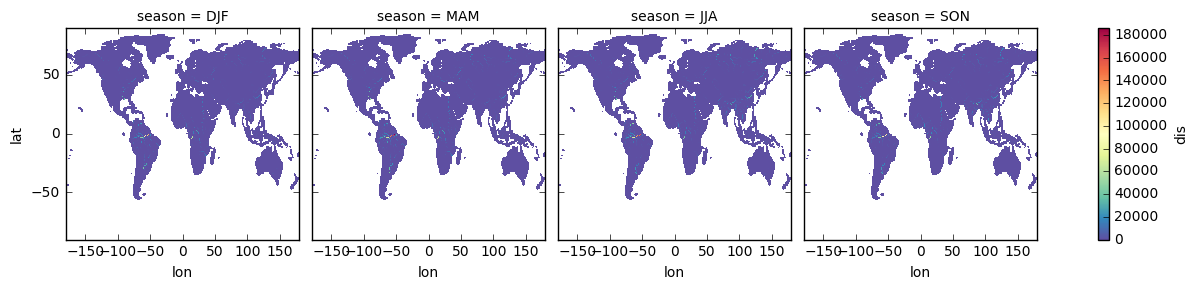

In [9]:
(ds_seasonal['dis']
 .sel(season=['DJF', 'MAM', 'JJA', 'SON'])
 .plot(col='season', size=3, cmap='Spectral_r'))

In [ ]:
dask.set_options(pool=ThreadPool(16))

In [10]:
%time ds_month = ds.groupby('time.month').mean('time')

Wall time: 47 ms


###We can also use split-apply-combine to use our own functions in an efficient way.
For example to calculate percentiles
    

In [11]:
def ds_pct(x):
    pcts=[90,80,70]
    ds_pcts=np.percentile(x,pcts,0)
    return xr.DataArray(ds_pcts)
dask.set_options(pool=ThreadPool(12))
%time ds_new = ds.dis.groupby('time.month').apply(ds_pct)

C:\Anaconda2\Lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


Wall time: 7min 20s


In [16]:
ds_new

<xarray.DataArray 'dis' (time: 3652, lat: 360, lon: 720)>
array([[[ nan, ...,  nan],
        ..., 
        [ nan, ...,  nan]],

       ..., 
       [[ nan, ...,  nan],
        ..., 
        [ nan, ...,  nan]]])
Coordinates:
  * lon      (lon) float32 -179.75 -179.25 -178.75 -178.25 -177.75 -177.25 ...
  * lat      (lat) float32 89.75 89.25 88.75 88.25 87.75 87.25 86.75 86.25 ...
  * time     (time) datetime64[ns] 2018-01-01 2018-01-02 2018-01-03 ...
    month    (time) int32 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ...

In [13]:
ds_new = ds_new.to_dataset(name='ds_pcts')
ds_new.rename({'dim_0': 'pcts','dim_1': 'lat','dim_2':'lon'}, inplace=True)
ds_new['pcts'] = [90,80,70]
ds_new['lat'] = ds.lat
ds_new['lon'] = ds.lon
ds_new

<xarray.Dataset>
Dimensions:  (lat: 360, lon: 720, month: 12, pcts: 3)
Coordinates:
  * pcts     (pcts) int32 90 80 70
  * lat      (lat) float32 89.75 89.25 88.75 88.25 87.75 87.25 86.75 86.25 ...
  * lon      (lon) float32 -179.75 -179.25 -178.75 -178.25 -177.75 -177.25 ...
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    ds_pcts  (month, pcts, lat, lon) float64 nan nan nan nan nan nan nan nan ...

In [14]:
def ds_sqrt(x):
    ds_sqrs=np.sqrt(x)
    return xr.DataArray(ds_sqrs)
dask.set_options(pool=ThreadPool(16))
%time ds_new = ds.dis.groupby('time.month').apply(ds_sqrt)

Wall time: 7min 7s


In [15]:
dask.set_options(pool=ThreadPool(32))
%time ds_new = ds.dis.groupby('time.month').apply(ds_sqrt)

Wall time: 6min 55s


Open a dataset of powerplants

For more details, read this blog post: http://continuum.io/blog/xray-dask